In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
   
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data)
clinical_trial_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
treatment_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID"])

# Display the data table for preview
treatment_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_Tumor_Volume = treatment_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Convert to DataFrame
df_mean_Tumor_Volume = pd.DataFrame(mean_Tumor_Volume)

# Preview DataFrame
df_mean_Tumor_Volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror_Tumor_Volume = treatment_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Convert to DataFrame
df_stderror_Tumor_Volume = pd.DataFrame(stderror_Tumor_Volume)

# Preview DataFrame
df_stderror_Tumor_Volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Rearrange the stderror using pivot_table
ptstderror_TumorVolume = df_stderror_Tumor_Volume.pivot_table(values=['Tumor Volume (mm3)'],index=['Timepoint'],columns=['Drug'])

# Drop multi Index value using drop level
ptstderror_TumorVolume.columns = ptstderror_TumorVolume.columns.droplevel(level=0)

# Preview that Reformatting worked
ptstderror_TumorVolume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames using pivot_table
ptmean_TumorVolume = df_mean_Tumor_Volume.pivot_table(values=['Tumor Volume (mm3)'],index=['Timepoint'],columns=['Drug'])

# Drop multi Index value using drop level
ptmean_TumorVolume.columns = ptmean_TumorVolume.columns.droplevel(level=0)

# Preview that Reformatting worked
ptmean_TumorVolume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


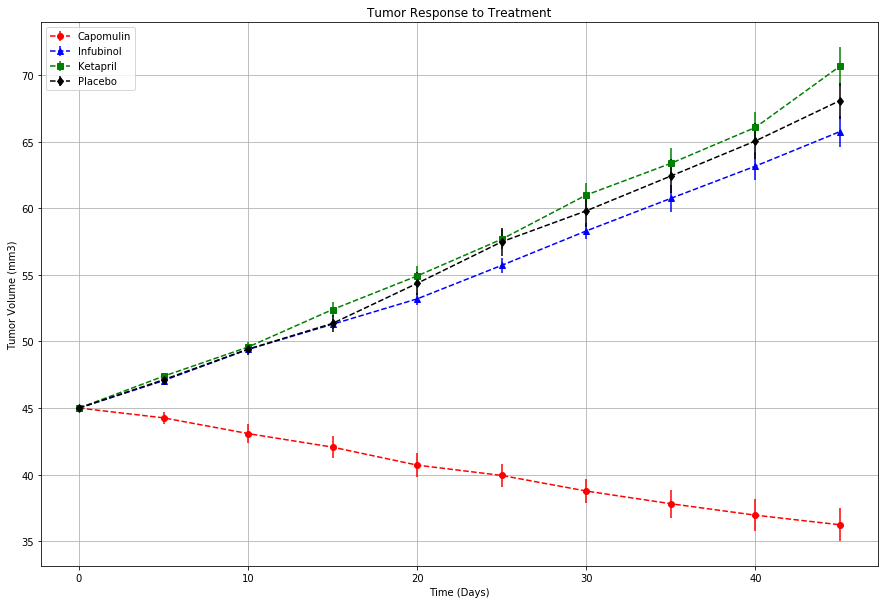

In [6]:
# Generate the Plot (with Error Bars)
# x_axis is the Timepoint, which is index of the ptmean_TumorVolume
# x_axis = np.arange(0,50,5) or value of index in ptmean_TumorVolume
x_axis = [value for value in ptmean_TumorVolume.index]
x_axis

#Treatments = ['Capomulin','Infubinol','Ketapril','Placebo']

y_C = ptmean_TumorVolume.Capomulin
yerr_C = ptstderror_TumorVolume.Capomulin

y_I = ptmean_TumorVolume.Infubinol
yerr_I = ptstderror_TumorVolume.Infubinol

y_K = ptmean_TumorVolume.Ketapril
yerr_K = ptstderror_TumorVolume.Ketapril

y_P = ptmean_TumorVolume.Placebo
yerr_P = ptstderror_TumorVolume.Placebo

#Plot Tumor Response to Treatment using a scatter plots (with Error Bars) for each treatment
plt.figure(figsize=(15,10))
plt.errorbar(x_axis, y_C, yerr_C, color='red', marker='o',ls= '--')
plt.errorbar(x_axis, y_I, yerr_I, color='blue', marker='^', ls= '--')
plt.errorbar(x_axis, y_K, yerr_K, color='green', marker='s', ls= '--')
plt.errorbar(x_axis, y_P, yerr_P, color='black', marker='d', ls= '--')

plt.legend()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig("Images/Tumor_Response_to_Treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_Metastatic_Response = treatment_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
df_mean_Metastatic_Response = pd.DataFrame(mean_Metastatic_Response)

# Preview DataFrame
df_mean_Metastatic_Response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderror_Metastatic_Response = treatment_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
df_stderror_Metastatic_Response = pd.DataFrame(stderror_Metastatic_Response)

# Preview DataFrame
df_stderror_Metastatic_Response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Rearrange the stderror using pivot_table
ptstderror_Metastatic_Response = df_stderror_Metastatic_Response.pivot_table(values=['Metastatic Sites'],index=['Timepoint'],columns=['Drug'])

# Drop multi Index value using drop level
ptstderror_Metastatic_Response.columns = ptstderror_Metastatic_Response.columns.droplevel(level=0)

# Preview that Reformatting worked
ptstderror_Metastatic_Response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [10]:
# Minor Data Munging to Re-Format the Data Frames using pivot_table
ptmean_Metastatic_Response = df_mean_Metastatic_Response.pivot_table(values=['Metastatic Sites'],index=['Timepoint'],columns=['Drug'])

# Drop multi Index value using drop level
ptmean_Metastatic_Response.columns = ptmean_Metastatic_Response.columns.droplevel(level=0)

# Preview that Reformatting worked
ptmean_Metastatic_Response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


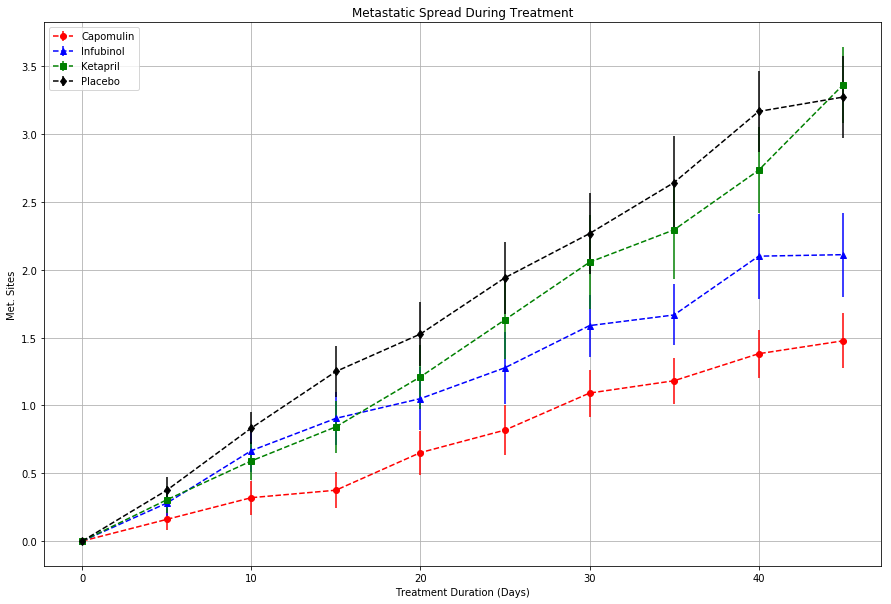

In [11]:
#Generate the Plot (with Error Bars)
# x_axis is the Timepoint, which is index of the ptmean_Metastatic_Response
# x_axis = np.arange(0,50,5) or value of index in ptmean_Metastatic_Response
x_axis = [value for value in ptmean_Metastatic_Response.index]
x_axis

y_MSR_C = ptmean_Metastatic_Response.Capomulin
yerr_MSR_C = ptstderror_Metastatic_Response.Capomulin

y_MSR_I = ptmean_Metastatic_Response.Infubinol
yerr_MSR_I = ptstderror_Metastatic_Response.Infubinol

y_MSR_K = ptmean_Metastatic_Response.Ketapril
yerr_MSR_K = ptstderror_Metastatic_Response.Ketapril

y_MSR_P = ptmean_Metastatic_Response.Placebo
yerr_MSR_P = ptstderror_Metastatic_Response.Placebo

#Plot Tumor Response to Treatment using a scatter plots (with Error Bars) for each treatment
plt.figure(figsize=(15,10))
plt.errorbar(x_axis, y_MSR_C, yerr_MSR_C, color='red', marker='o',ls= '--')
plt.errorbar(x_axis, y_MSR_I, yerr_MSR_I, color='blue', marker='^', ls= '--')
plt.errorbar(x_axis, y_MSR_K, yerr_MSR_K, color='green', marker='s', ls= '--')
plt.errorbar(x_axis, y_MSR_P, yerr_MSR_P, color='black', marker='d', ls= '--')


plt.legend()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig("Images/Metastatic_Spread_During_Treatment.png")

plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_Survival_Rates = treatment_data.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()

# ---> Rename Mouse ID to Mouse Count
count_Survival_Rates_renamed = count_Survival_Rates.rename(columns = {'Mouse ID':'Mouse Count'})

# Convert to DataFrame
df_count_Survival_Rates = pd.DataFrame(count_Survival_Rates_renamed)

# Preview DataFrame
df_count_Survival_Rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames using pivot_table
ptcount_Survival_Rates = df_count_Survival_Rates.pivot_table(values=['Mouse Count'],index=['Timepoint'],columns=['Drug'])

# Drop multi Index value using drop level
ptcount_Survival_Rates.columns = ptcount_Survival_Rates.columns.droplevel(level=0)

# Preview that Reformatting worked
ptcount_Survival_Rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


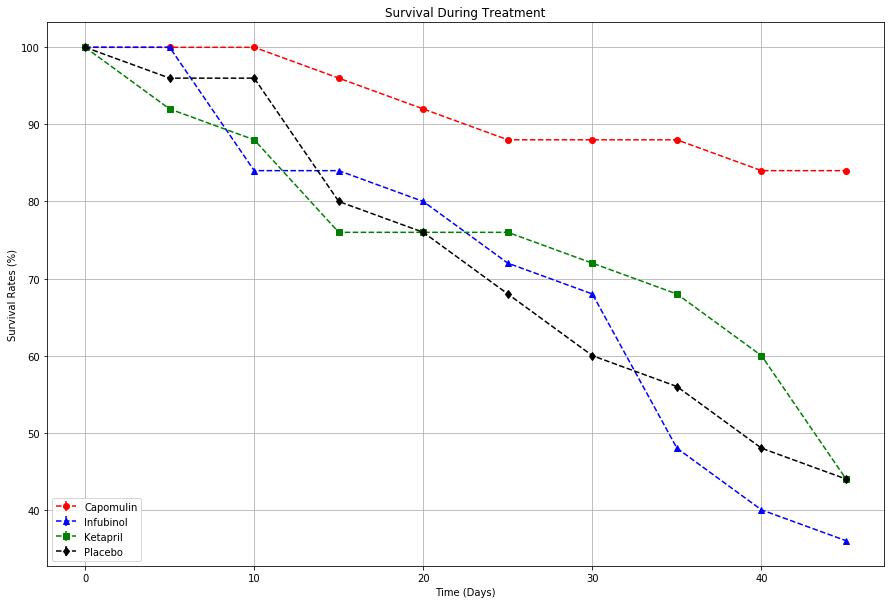

In [14]:
# Generate the Plot (Accounting for percentages)

# x_axis is the Timepoint, which is index of the ptcount_Survival_Rates.Capomulin
# x_axis = np.arange(0,50,5) or value of index in ptcount_Survival_Rates.Capomulin
x_axis = [value for value in ptcount_Survival_Rates.Capomulin.index]
x_axis


# Multiply the count survival rate by 4 to make it 100 %
Surv_Rates_Capomulin =  4 * ptcount_Survival_Rates.Capomulin
Surv_Rates_Infubinol = 4 * ptcount_Survival_Rates.Infubinol
Surv_Rates_Ketapril = 4 * ptcount_Survival_Rates.Ketapril
Surv_Rates_Placebo = 4 * ptcount_Survival_Rates.Placebo

# Errorbar for treatment
plt.figure(figsize=(15,10))
plt.errorbar(x_axis, Surv_Rates_Capomulin, yerr=0.05, color='red',marker='o', ls = '--')
plt.errorbar(x_axis, Surv_Rates_Infubinol, yerr=0.05, color='blue',marker='^', ls = '--')
plt.errorbar(x_axis, Surv_Rates_Ketapril, yerr=0.05, color='green', marker='s', ls = '--')
plt.errorbar(x_axis, Surv_Rates_Placebo, yerr=0.05, color='black',marker='d', ls = '--')


plt.legend(loc='lower left')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rates (%)')
plt.grid()

# Save the Figure
plt.savefig("Images/Survival_During_Treatment.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug of the past 45 days
summary_bar_graph_per_change = ptmean_TumorVolume.pct_change().sum()*100


# Display the data to confirm
summary_bar_graph_per_change

Drug
Capomulin   -21.391539
Ceftamin     36.141889
Infubinol    38.746192
Ketapril     46.308083
Naftisol     44.193800
Placebo      42.393592
Propriva     39.543684
Ramicane    -24.865579
Stelasyn     42.945527
Zoniferol    39.068045
dtype: float64

<Figure size 1440x432 with 0 Axes>

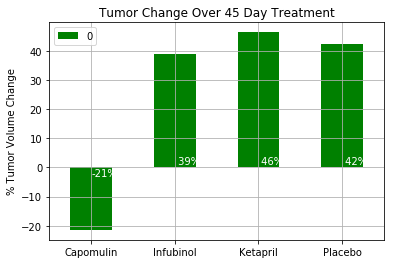

In [16]:
# Store all Relevant Percent Changes into a Tuple
df = pd.DataFrame(summary_bar_graph_per_change)


# Splice the data between passing and failing drugs
df_treatment = df.iloc[[0,2,3,5]]
df_treatment["Tumor_Reduction"] = df_treatment.values < 0
df_treatment

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(20,6))

# Not sure why it's not showing red for the false
df_treatment.plot.bar(color=df_treatment.Tumor_Reduction.map({True: 'g', False: 'r'}))

plt.xticks(rotation=0)
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel(' ')
plt.ylabel('% Tumor Volume Change')
plt.grid()
plt.text(0, -3, r'-21%',color='w')
plt.text(1, 1, r' 39%', color='w')
plt.text(2, 1, r' 46%', color='w')
plt.text(3, 1, r' 42%', color= 'w')


# Save the Figure
plt.savefig("Images/Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()


# Observable trends based on the Pymaceuticals Inc datasets 

Based on the provided data, I observed the following trends while analysing the data for Pymaceuticals Inc
-Tumor Response To Treatment: Tumor decreases significantly with Capomulin drug over 45 days while tumor growth for the other drugs like Infubinol, Ketapril and Placebo increases, the tumor growth is high. 

-Also, the errorbars in Capomulin is lower compared to others and it is the only drug that reduces the tumor.

-Metastatic Response to Treatement: the level for Capomulin is lower compared to the other drug.

-Tumor Volume Change: the level is lower for Campomulin the other drugs. The other drugs are higher.

-Survival Rates: The count of mouse exposed to Capomulin drug is higher compared to Infubinol, Ketapril and Placebo drugs. More survival rate with use of Capomulin

In conclusion, Capomulin is the only drug that reduces the tumor (negative), tumor increases (positive) with the other drugs.
 
